## Import dataset do GIT

In [ ]:
import os
import shutil
import zipfile
import git

# Define paths
repo_url = "https://github.com/vitor10102002/Dataset2rotulos.git"
download_path = "C:/content/Dataset2rotulos"
zip_file_path = "C:/content/Dataset2rotulos/Imagens_Resized.zip"
extract_path = "C:/content"

# Clone the repository
if os.path.exists(download_path):
    try:
        shutil.rmtree(download_path)  # Remove the existing folder if any
    except:
        print("")

git.Repo.clone_from(repo_url, download_path)

# Check if the file exists in the cloned repo
if os.path.exists(zip_file_path):
    print("Found Imagens_Resized.zip")
else:
    print("Imagens_Resized.zip not found in the repository.")

# Optionally, unzip the file
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted {zip_file_path} to {extract_path}")

Found Imagens_Resized.zip
Extracted C:/content/Dataset2rotulos/Imagens_Resized.zip to C:/content


## Pré-processamento das imagens com o rótulo 1

In [2]:
import cv2
def preprocess_image(image):
    """
    Aplicar pré-processamentos nas imagens:

    """

    resized_image = cv2.resize(image, (224, 224))

    return resized_image

In [ ]:
import cv2
import os

# Diretório das imagens originais e processadas
image_folder = "C:\\content\\out_resized"
output_folder = "C:\\content\\processadas\\rotulo_M1"

# Criar pasta de saída se não existir
os.makedirs(output_folder, exist_ok=True)

# Listar arquivos na pasta e filtrar apenas os que começam com "M1_"
image_files = [f for f in os.listdir(image_folder) if f.startswith("M1_") and f.lower().endswith(('.jpg', '.png', '.jpeg'))]

print(f"Encontradas {len(image_files)} imagens M1 para processamento...")

for filename in image_files:
    image_path = os.path.join(image_folder, filename)

    # Ler a imagem
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erro ao carregar {filename}, pulando...")
        continue

    # 🔹 Pré-processamento
    processed_image = preprocess_image(image)

    # Criar um novo nome para evitar sobrescrita
    new_filename = f"processada_{filename}"
    save_path = os.path.join(output_folder, new_filename)

    # Salvar a imagem processada
    cv2.imwrite(save_path, processed_image)

print("✅ Processamento concluído!")


Encontradas 105 imagens M1 para processamento...
✅ Processamento concluído!


## Anomaly Lib

In [1]:
from anomalib import TaskType
from anomalib.models import Patchcore, Padim, Stfpm, Draem, EfficientAd
from anomalib.engine import Engine
from anomalib.deploy import ExportType
from anomalib.callbacks import ModelCheckpoint
from anomalib.data import Folder


## Create the datamodule
#datamodule = Folder(
#    name="Rotulos_marca_M1",
#    root="C:\\content\\processadas",
#    normal_dir="rotulo_M1",
#    test_split_mode=TestSplitMode.SYNTHETIC,
#    task="classification",
#)
# Create the datamodule
datamodule = Folder(
    name="hazelnut_toy",
    root="C:\\content\\hazelnut_toy",
    normal_dir="good",
    abnormal_dir="crack",
    task=TaskType.CLASSIFICATION,
    train_batch_size=1,
    image_size=(256,256)
)
# Setup the datamodule
datamodule.setup()

c:\Users\vitor\AppData\Local\anaconda3\envs\anomalib1\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
INFO:anomalib.data.base.datamodule:No normal test images found. Sampling from training set using a split ratio of 0.20


In [2]:
#imports
from anomalib import TaskType
from anomalib.models import Patchcore, Padim, Stfpm, Draem, EfficientAd
from anomalib.engine import Engine
from anomalib.deploy import ExportType
from anomalib.callbacks import ModelCheckpoint
from anomalib.data import Folder


# Create the model and engine
model = EfficientAd()
engine = Engine(max_epochs=10, task=TaskType.CLASSIFICATION, callbacks=None)

# Train the model
engine.fit(datamodule=datamodule, model=model)
engine.test(model, datamodule=datamodule)
engine.export(export_type=ExportType.TORCH,
              model=model,
              export_root="C:\\content\\hazelnut_toy\\models")



INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.base.datamodule:No normal test images found. Sampling from training set using a split ratio of 0.20
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | EfficientAdModel         | 8.1 M  | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metrics | MetricCollection         | 0      | train
3 | image_threshold       | F1AdaptiveThreshold      | 0      | train
4 | pixel_threshold       | F1AdaptiveThreshold      | 0      | train
5 | image_metrics         | AnomalibMetricCollection | 0      | train
6 | pixel_metrics         | AnomalibMetricCollection | 0      | train
--

Training: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Load pretrained teacher model from pre_trained\efficientad_pretrained_weights\pretrained_teacher_small.pth
c:\Users\vitor\AppData\Local\anaconda3\envs\anomalib1\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
Calculate teacher channel mean & std: 100%|██████████| 28/28 [00:27<00:00,  1.02it/s]
c:\Users\vitor\AppData\Local\anaconda3\envs\anomalib1\lib\site-packages\lightning\pytorch\core\module.py:512: You called `self.log('train_st', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
c:\Users\vitor\AppData\Local\anaconda3\envs\anomalib1\lib\site-packages\lightning\pytorch\core\module.py:512: You called `self.log('train_

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:47<00:00, 47.65s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:42<00:00, 42.33s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:45<00:00, 45.02s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:45<00:00, 45.32s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:42<00:00, 42.84s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:42<00:00, 42.22s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:44<00:00, 44.76s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:43<00:00, 43.77s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:43<00:00, 43.07s/it]


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.models.image.efficient_ad.lightning_model:Calculate Validation Dataset Quantiles
Calculate Validation Dataset Quantiles: 100%|██████████| 1/1 [00:44<00:00, 44.57s/it]
`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:anomalib.callbacks.timer:Training took 873.28 seconds
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\vitor\AppData\Local\anaconda3\envs\anomalib1\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 23.47381854057312 seconds
Throughput (batch_size=32) : 0.2556039184519277 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.7777777910232544     │
│       image_F1Score       │     0.800000011920929     │
└───────────────────────────┴───────────────────────────┘

INFO:root:Exported model to C:\content\hazelnut_toy\models\weights\torch\model.pt


WindowsPath('C:/content/hazelnut_toy/models/weights/torch/model.pt')

In [ ]:
# Inference
from anomalib import TaskType
from anomalib.deploy import TorchInferencer
from anomalib.data.utils import read_image
from matplotlib import pyplot as plt

import torch

# Carregar o modelo com weights_only=False
inferencer = TorchInferencer(
    "C:\\content\\hazelnut_toy\\models\\weights\\torch\\model.pt",
    device="cuda",
    weights_only=False  # Adicionando esse parâmetro
)

predictions = inferencer.predict("C:\\content\\hazelnut_toy\\colour\\01.jpg")

# Output 1
print(predictions.pred_score)

# Output 2
print(predictions.pred_label)

# Output 3
plt.imshow(predictions.pred_mask)

✅ Modelo carregado com sucesso via torch.load(weights_only=False)
❌ Erro ao rodar a inferência: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL torch.nn.modules.container.ParameterDict was not an allowed global by default. Please use `torch.serialization.add_safe_globals([ParameterDict])` or the `torch.serialization.safe_globals([ParameterDict])` context manager to allowlist this global if you trust this class/function

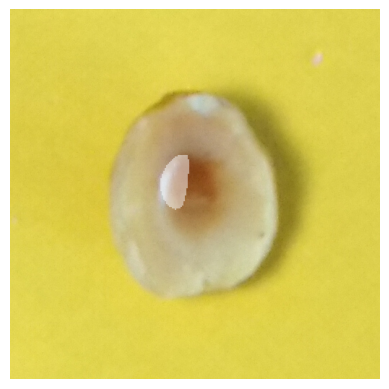

1.0
LabelName.ABNORMAL


In [14]:
# Inference
from anomalib import TaskType
from anomalib.deploy import TorchInferencer
from anomalib.data.utils import read_image
from matplotlib import pyplot as plt
import numpy as np

inferencer = TorchInferencer("C:\\content\\hazelnut_toy\\models\\weights\\torch\\model.pt", device="cuda")
image_to_analize_path="C:\\content\\hazelnut_toy\\crack\\05.jpg"
predictions = inferencer.predict(image_to_analize_path)

# Carregar a imagem original
original_image = read_image(image_to_analize_path)

# Obter a máscara do defeito
mask = predictions.pred_mask

# Criar uma imagem com a máscara sobre a imagem original (sem alterar a cor)
alpha = 0.5  # Controle da transparência (0.0: totalmente transparente, 1.0: totalmente opaco)

# Aplicar a máscara na imagem original, sem alterar as cores
overlay_image = original_image.copy()

# Definir a cor branca como um array numpy
white_color = np.array([1, 1, 1])

# Aplique a máscara sem alterar a cor da imagem original
overlay_image[mask > 0] = overlay_image[mask > 0] * (1 - alpha) + white_color * alpha  # Destaque em branco

# Exibir a imagem com a máscara de defeito sobreposta
plt.imshow(overlay_image)
plt.axis('off')  # Para não mostrar os eixos
plt.show()

# Output 1
print(predictions.pred_score)

# Output 2
print(predictions.pred_label)
